In [12]:
import json
from math import sqrt
import random
import pandas as pd
import numpy as np
from numpy import ndarray as NDArray
import matplotlib.pyplot as plt
def visualize_selected_route(
    selected_nodes_indices: list[int], 
    dataframe: pd.DataFrame,
    title: str) -> None:
    """
    Visualize the selected route returned by the algorithm, including the cost of each node represented by a colormap.

    Parameters:
    selected_nodes_indices (list): Indices of the selected nodes in the route.
    dataframe (DataFrame): DataFrame containing 'x', 'y', and 'cost' columns for each node.
    """
    x = dataframe["x"].to_numpy()
    y = dataframe["y"].to_numpy()
    costs = dataframe["cost"].to_numpy()

    cmap = plt.cm.get_cmap('viridis')
    norm = plt.Normalize(vmin=min(costs), vmax=max(costs))

    plt.figure(figsize=(15, 10))
    scatter = plt.scatter(x, y, c=costs, cmap=cmap, norm=norm, s=100)
    plt.colorbar(scatter, label='Node Cost')

    for i, node in enumerate(selected_nodes_indices):
        start_node = selected_nodes_indices[i]
        end_node = selected_nodes_indices[(i + 1) % len(selected_nodes_indices)]
        plt.plot([x[start_node], x[end_node]], [y[start_node], y[end_node]], 'k-', lw=1)

    plt.title(title, fontsize=18)
    plt.xlabel('X Coordinate', fontsize=14)
    plt.ylabel('Y Coordinate', fontsize=14)
    plt.grid(True)
    plt.savefig(title + ".png")
    plt.show()


In [13]:
instances = {
    "A": pd.read_csv("data/TSPA.csv", sep=';', header=None, names=["x", "y", "cost"]),
    "B": pd.read_csv("data/TSPB.csv", sep=';', header=None, names=["x", "y", "cost"]),
    "C": pd.read_csv("data/TSPC.csv", sep=';', header=None, names=["x", "y", "cost"]),
    "D": pd.read_csv("data/TSPD.csv", sep=';', header=None, names=["x", "y", "cost"]),
}

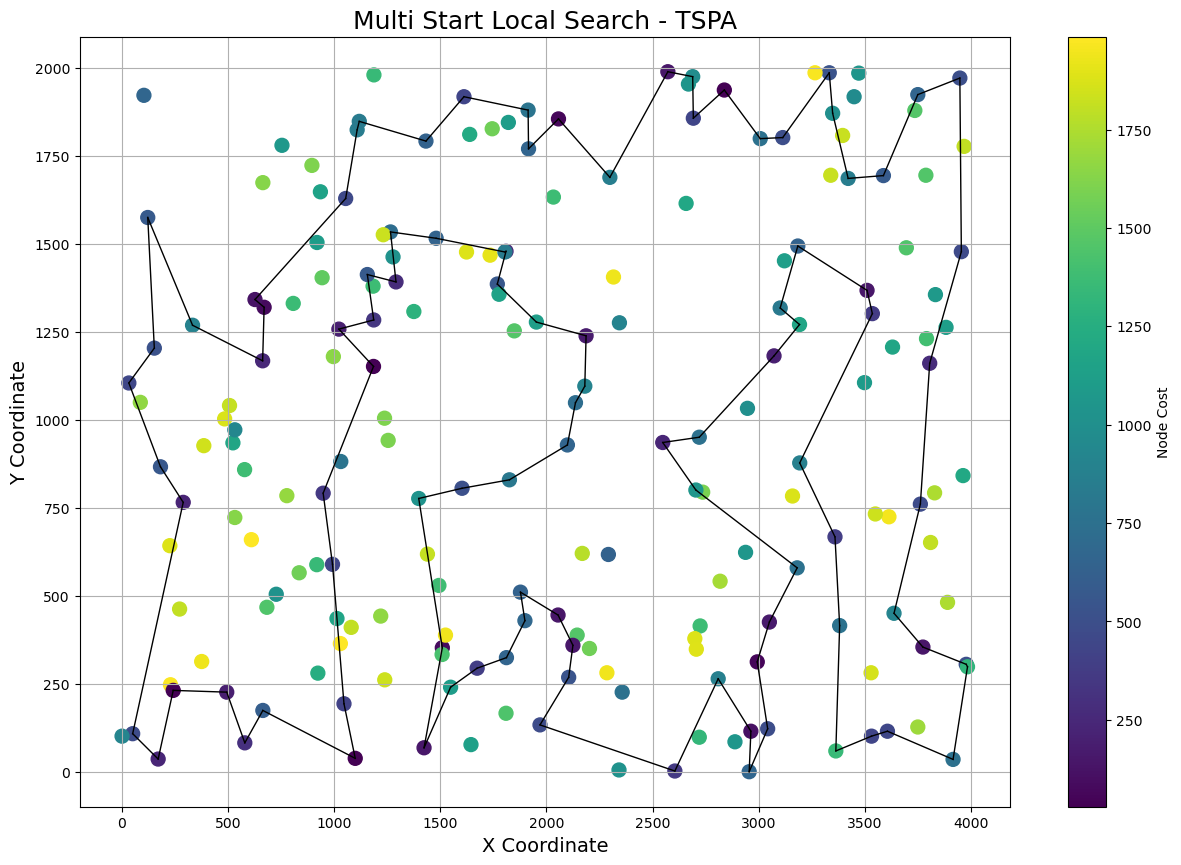

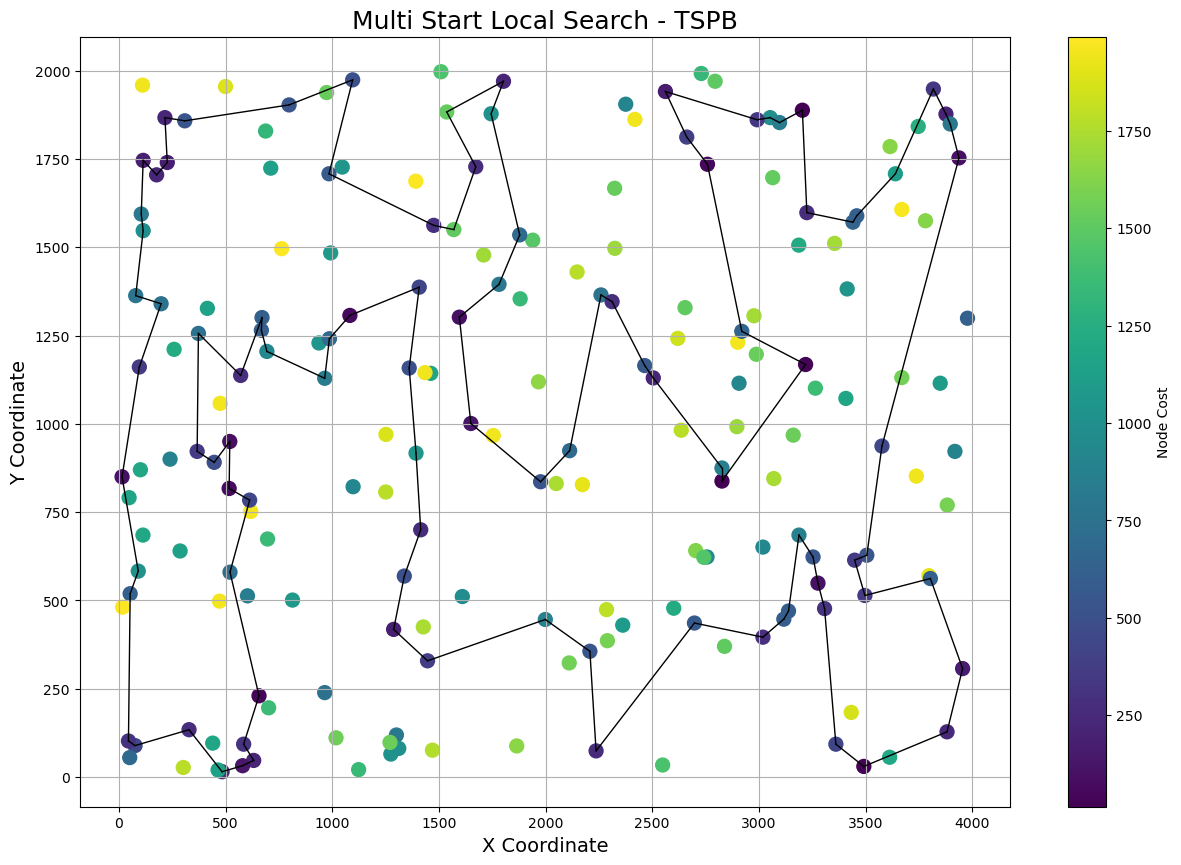

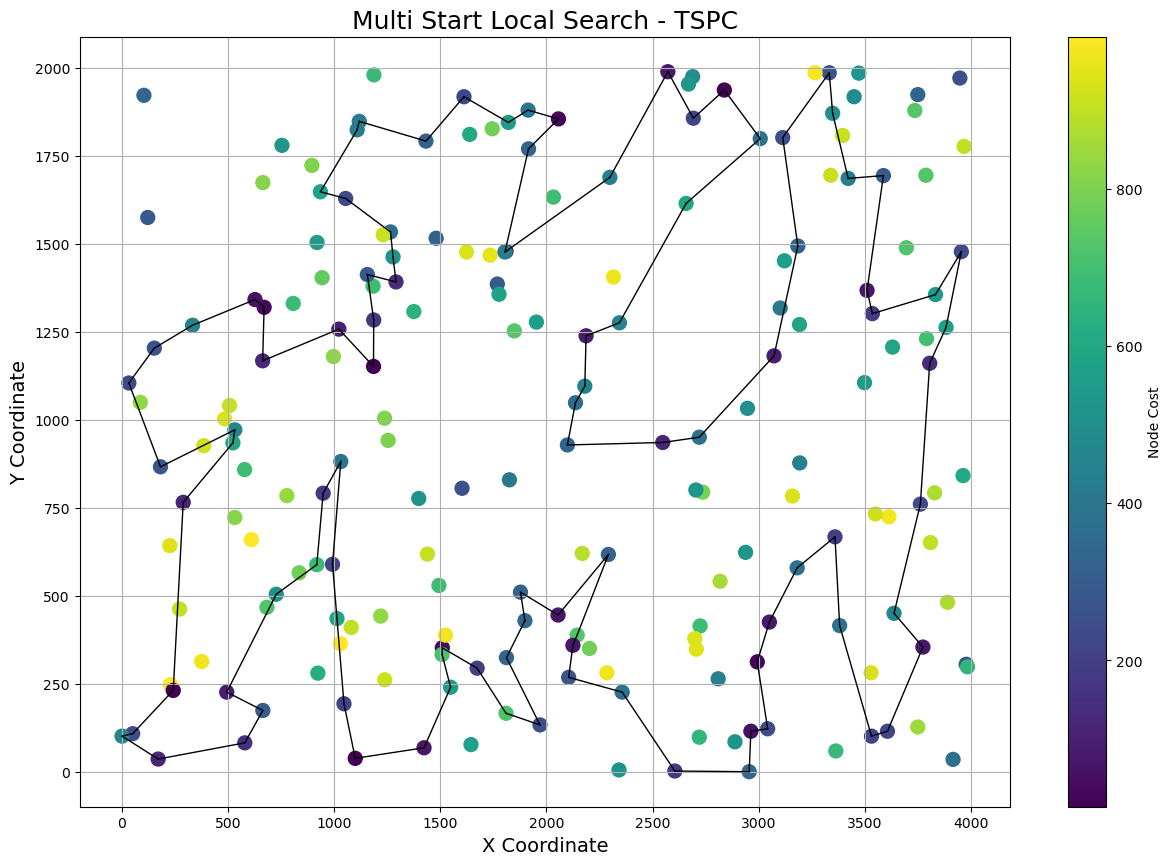

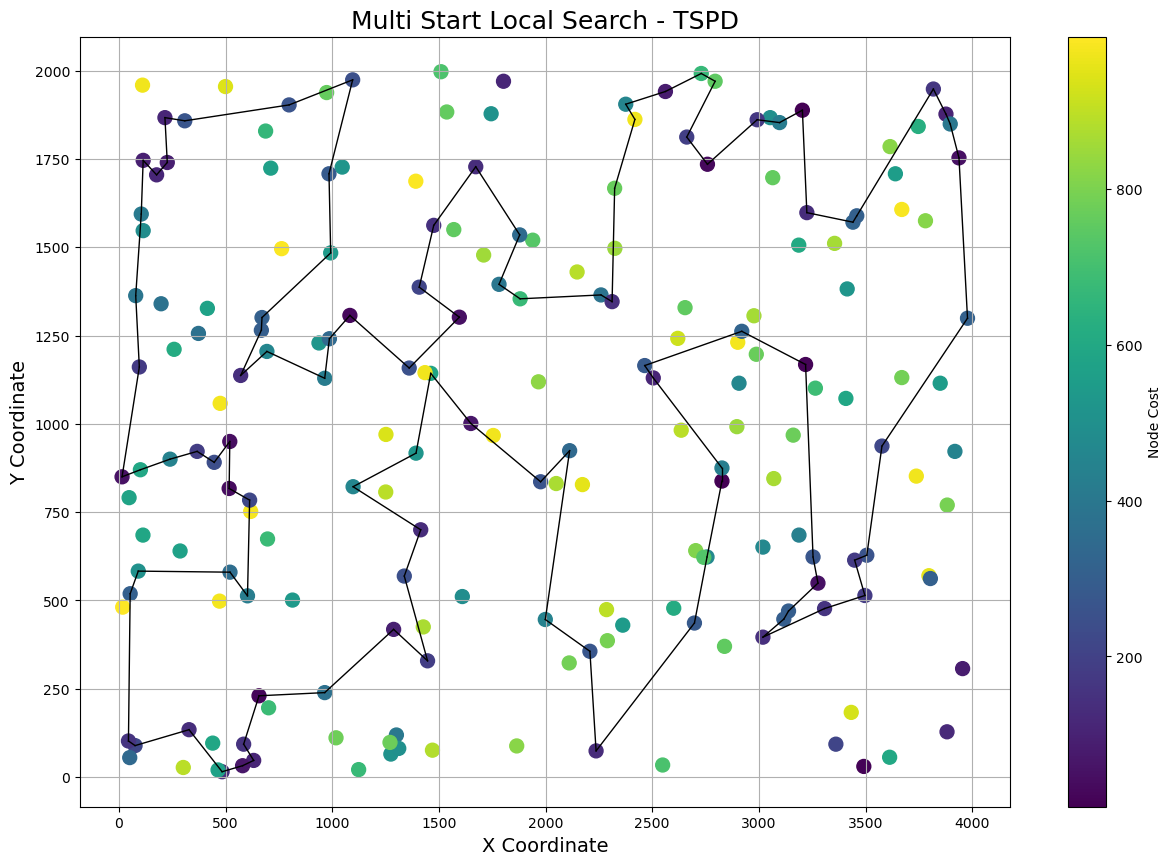

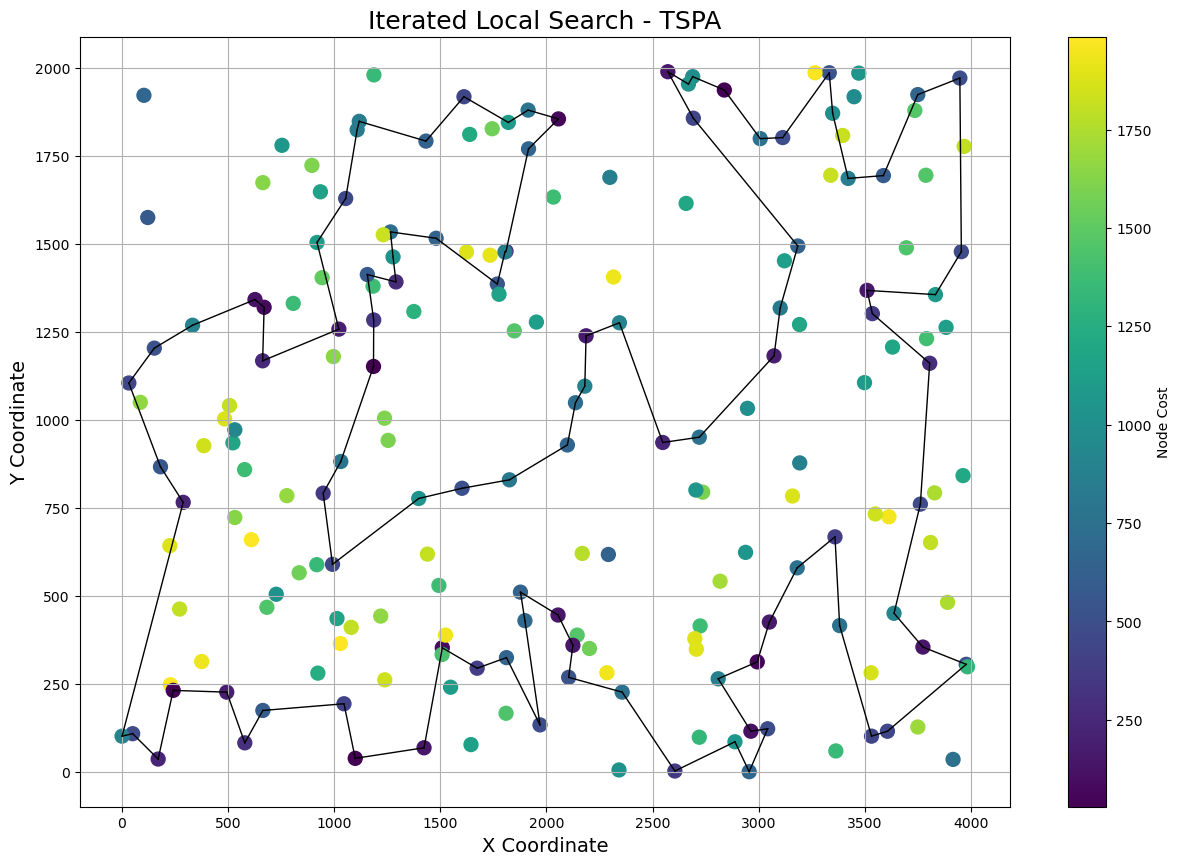

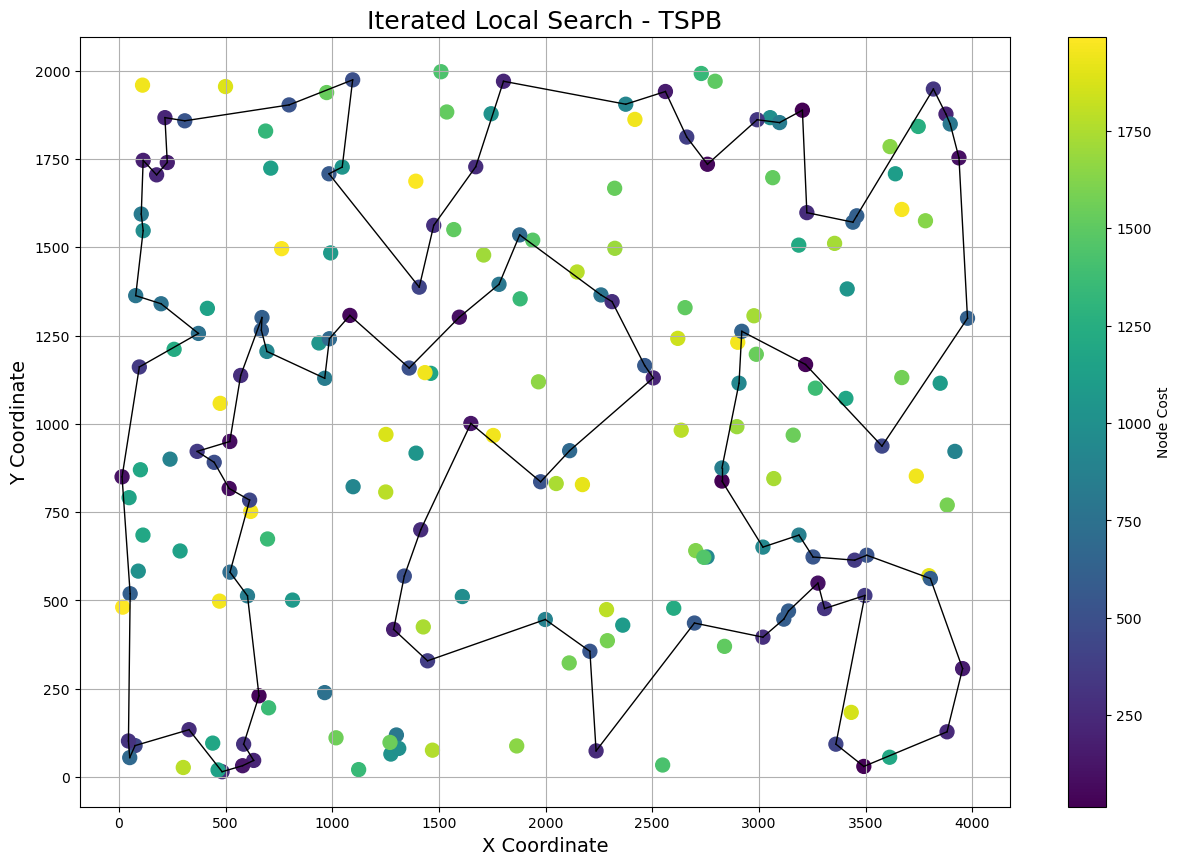

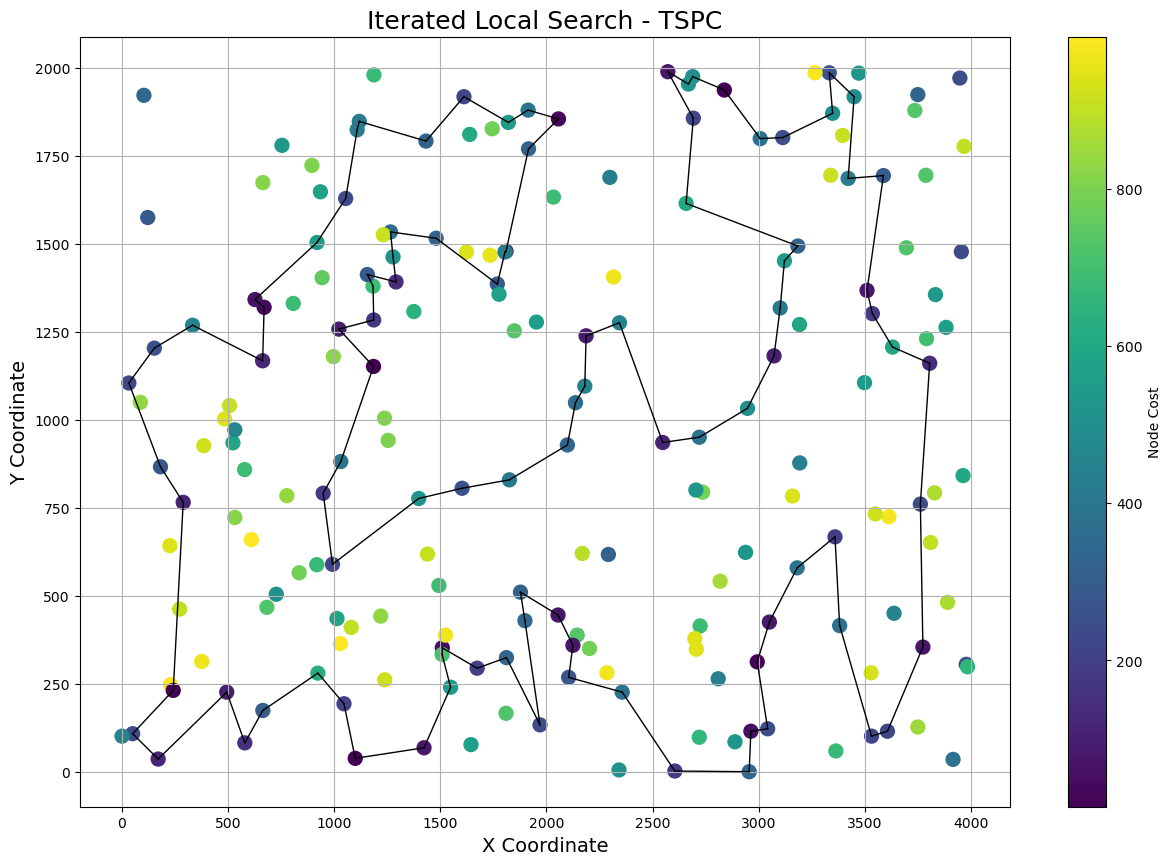

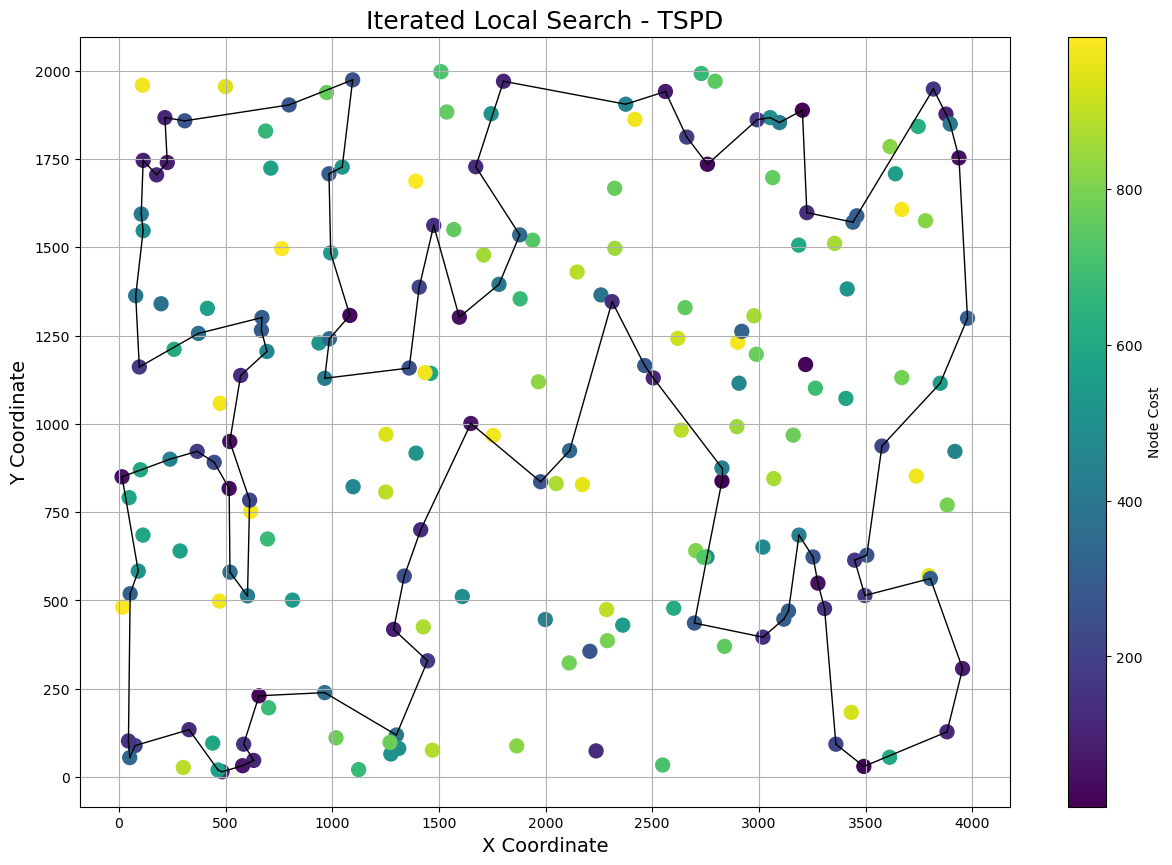

In [14]:
with open("best_solutions_MSLS.json", "r") as f:
    data= json.load(f)
instance=["A","B","C","D"]
for idx,x in enumerate(data):
    visualize_selected_route(data[x][0], instances[instance[idx]],"Multi Start Local Search - TSP"+instance[idx])
with open("best_solutions_ILS.json", "r") as f:
    data= json.load(f)
for idx,x in enumerate(data):
    visualize_selected_route(data[x][0], instances[instance[idx]],"Iterated Local Search - TSP"+instance[idx])
